In [2]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
df = pd.DataFrame(iris.data, columns=columns)
df['target'] = iris.target
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


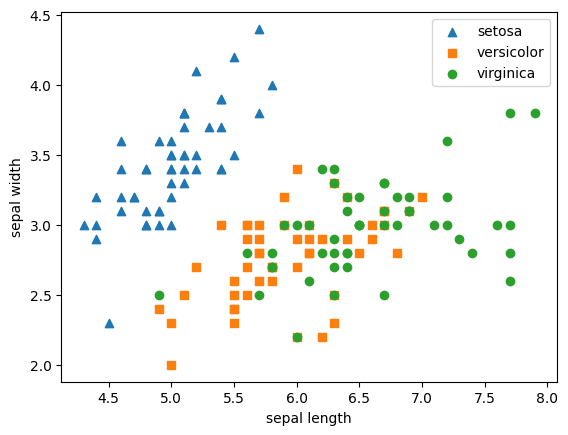

In [3]:
#setosa : ^, versicolor : s, virginica : o
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df[df['target'] ==i]['sepal_length']
    y_axis_data = df[df['target'] ==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()


- pca 는 여러 속성의 값을 연산하기 때문에 피처 정규화 필요함 

In [5]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(df.iloc[:, :-1])
iris_scaled.shape

(150, 4)

- pca 변환 수행 

In [ ]:
from sklearn.decomposition import PCA 

# 2차원 
pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [7]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
df_pca['target'] = iris.target
df_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


### PCA로 차원 축소된 피처들로 데이터 산포도 시각화 

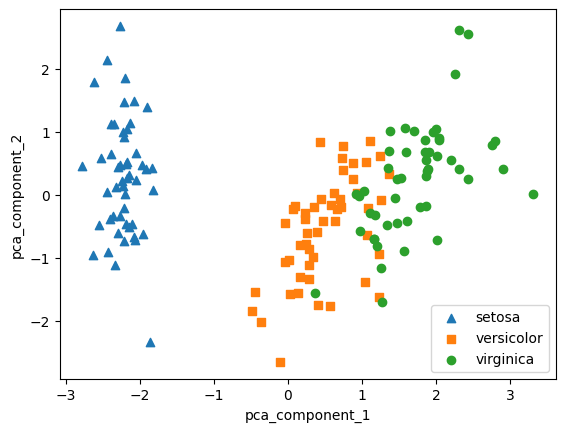

In [9]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = df_pca[df_pca['target']==i]['pca_component_1']
    y_axis_data = df_pca[df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- 각 PCA Component별 변동성 비율 

In [ ]:
print(pca.explained_variance_ratio_) # 2개 요소로만 원본 데이터의 변동성을 95% 설명 할수 있음 

[0.72962445 0.22850762]


In [11]:
# 원본데이터와 PCA 변환된 데이터 기반 예측 성능 비교 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np 

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


- pca 변환 데이터 

In [13]:
pca_X = df_pca[['pca_component_1', 'pca_component_2']]
scores = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
원본 데이터 평균 정확도: 0.88


#### 신용카드 데이터 세트 pca 변환 

In [ ]:
pd.set_option('display.max_columns', 30)

df = pd.read_excel('../data/default of credit card clients.xls', header=1, sheet_name='Data').iloc[:,1:]
print(df.shape)
df.head(3)
df.info()

# default payment next month : 다음달 연체 여부, 연체 1 정상납부0 

(30000, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64

In [18]:
#전처리 
df.rename(columns={'PAY0' : 'PAY1', 'default payment next month' : 'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

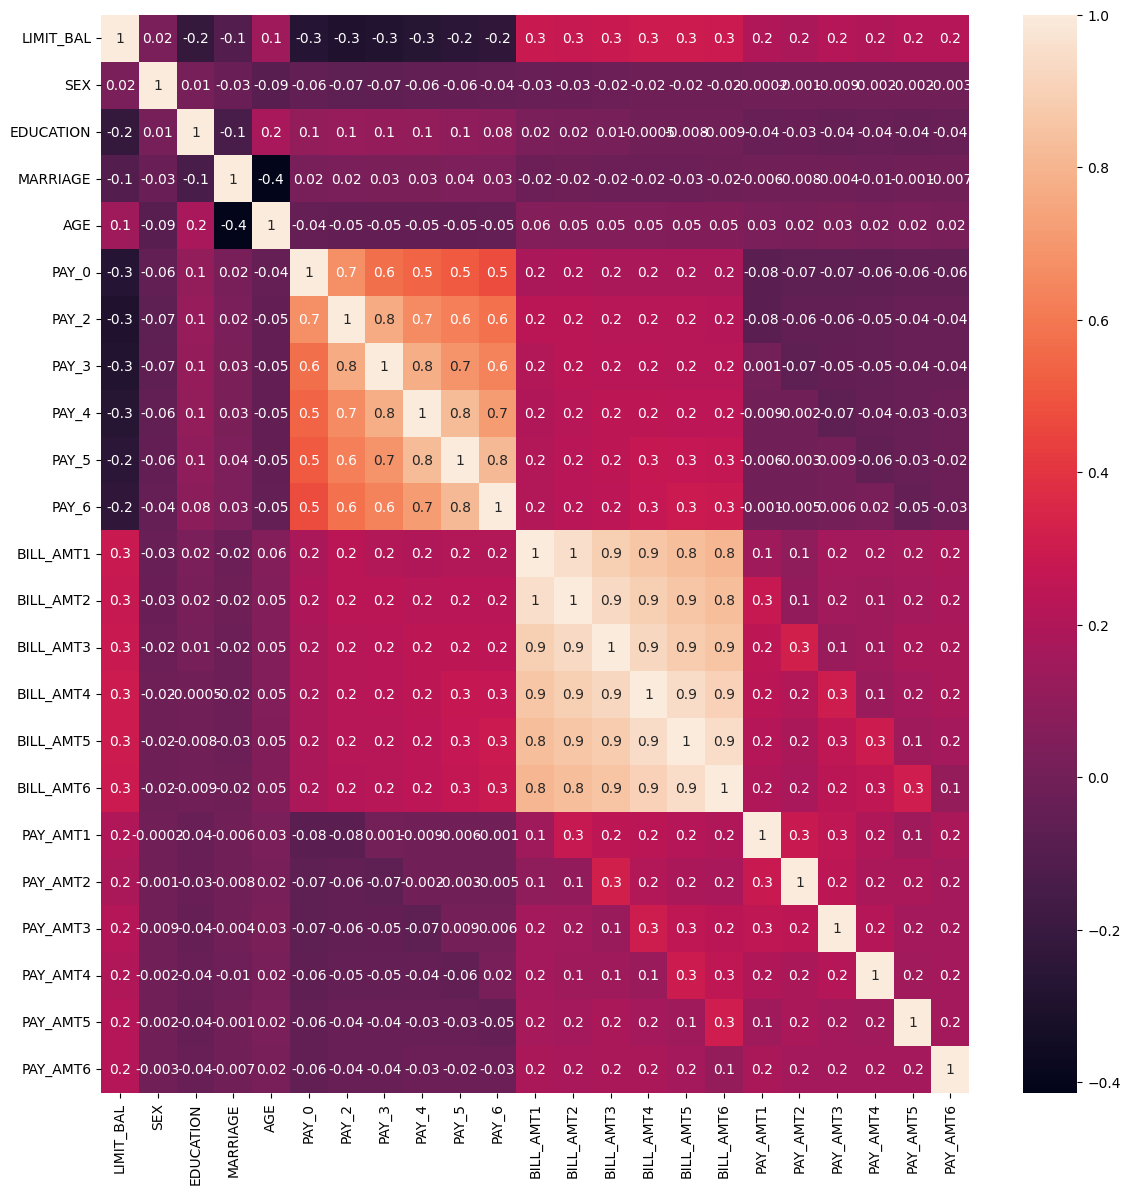

In [21]:
import seaborn as sns 

# 피처간 상관도 확인 
corr = X_features.corr()
plt.figure(figsize=(14, 14))

sns.heatmap(corr, annot=True, fmt='.1g')
plt.show()

In [22]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 

cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]
print(cols_bill)

# 2개의 pca 속성을 가진 pca 객체 생성 후 훈련 
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print(pca.explained_variance_ratio_)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
[0.90555253 0.0509867 ]


In [23]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7912 0.7974 0.802 ]
PCA 변환 데이터 셋 평균 정확도:0.7969
